In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install rake-nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk.data
from nltk import sent_tokenize, word_tokenize, PorterStemmer

In [ ]:

file1 = open('/content/gdrive/MyDrive/projectfolder/CharlestonFeb28_2020.txt','r')
data1 = file1.read()
sentences = sent_tokenize(data1)
split_words=data1.split(" ")
print(len(sentences))
print(len(data1.split(" ")))
for i in split_words:
  print(i)

In [ ]:
manual_file = open("/content/gdrive/MyDrive/projectfolder/manual_keywordsry.txt",'r')
data_manual = manual_file.read()
manual_phrases = data_manual.split("\n")
print(len(manual_phrases))
for i in manual_phrases:
  print(i)

29
democrat field also supports deadly sanctuary cities
executive order imposing price transparency
launched new initiatives combating kidney disease
giving 40 million american families
president supports free federal welfare
venezuela large scale version
000 jobs last month alone
lowering healthcare costs like nobody
stopping surprise medical billing
passed criminal justice reform
great night last night ."
South Carolina Republican
United States
America
Democrat
Republican party
great people
Trump
people
Carolina
Mini Mike
President
year
country
Tim
Democrats
makes seven million jobs since
region … … thousand soldiers protecting



In [ ]:
from rake_nltk import Rake
import random
import time
r = Rake()

In [ ]:

file2 = open("/content/gdrive/MyDrive/projectfolder/output.txt",'w')

def rake_measures(y,manual_keywords):
  common = set(y) & set(manual_keywords)
  TP= len(common)
  FP  = len(y)-TP
  FN  = len(manual_keywords)-TP
  precision = (TP)/(TP+FP)
  recall =  (TP)/len(manual_keywords)
  f_measure = (2*precision*recall)/(precision+recall)
  miss_rate = FN/(TP+FN)
  '''
  Accuracy = (TP+TN)/ TOTAL
  error_rate = (FP+FN)/ TOTAL
  specificity = (TN)/(FP+TN)
  '''
  print("precision=",precision," recall=",recall," f-measure=",f_measure)
  #print("TP=",TP,"FP",FP,"FN=",FN)

def rake(data):
  rake_phrases={}
  rake_accuracy = {}
  rake_error_rate = {}
  count = 0
  
  for i in [5,10,15,20]:
    start_time_rake = time.time()
    r.extract_keywords_from_text(data)
    t = r.get_ranked_phrases()[:i]
    y = r.get_ranked_phrases_with_scores()[:i]
    end_time_rake = time.time()
    #manual_keywords=random.sample(y, int((1/3)*len(y)))
    time_yake = end_time_rake-start_time_rake
    
    q = []
    for j in y:
      print(j[1])
      if j[1] in manual_phrases:
        q.append(j[1])
    rake_phrases[i]=len(set(q))
    accuracy = float((len(set(q))/i)*100)
    rake_accuracy[i]= accuracy
    rake_error_rate[i] = (100-accuracy)
    print("the RAKE measures for ",i," rake extracted keywords :")
    rake_measures(t,manual_phrases)
    print()

  return rake_phrases,rake_accuracy
  #print(manual_keywords)
  

rake_sol1,rake_sol2 = rake(data1)


In [ ]:
all_words=[]
def rake_write_data(data):
  r.extract_keywords_from_text(data)
  t = r.get_ranked_phrases()
  t=set(t)
  for i in t:
    words = i.split(" ")
    for j in words:
      all_words.append(j)
rake_write_data(data1)
all_words=set(all_words)

for i in all_words:
  if i.isalpha():
    file2.write(i+" ")



In [ ]:
pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=77928 sha256=bf69e03cf8ce8457bdd8322089b4449820d209d4a52b2ae884e49245bafc4298
  Stored in directory: /root/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built jellyfish


In [ ]:
import yake
file3 = open("/content/gdrive/MyDrive/projectfolder/super1.txt",'w')

all_yake_words = []
def yake_algo(data):
  yake_phrases = {}
  yake_accuracy = {}
  count= 0
  kw_extractor = yake.KeywordExtractor()
  keywords = kw_extractor.extract_keywords(data)
  for i in keywords:
    words = i[0].split(" ")
    for j in words:
      all_yake_words.append(j)

  for i in [5,10,15,20]:
    count = 0
    start_time_rake = time.time()
    keywords = kw_extractor.extract_keywords(data)[:i]
    end_time_rake = time.time()
    time_yake = end_time_rake-start_time_rake

    for j in keywords:
      print(j[0])
      if j[0] in manual_phrases:
        count+=1
    accuracy = float((count/i)*100)
    yake_phrases[i]=count
    yake_accuracy[i]= accuracy

  return yake_phrases,yake_accuracy
yake_sol1,yake_sol2 = yake_algo(data1)

all_yake_words = set(all_yake_words)
for i in all_yake_words:
  if i.isalpha():
    file3.write(i+" ")

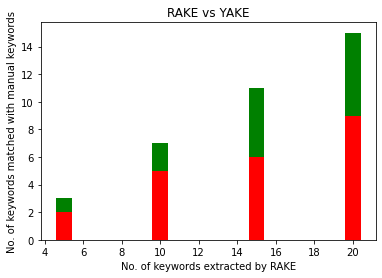

In [ ]:

from matplotlib import pyplot as plt  
plt.bar(list(rake_sol1.keys()),list(rake_sol1.values()),color='green')  
plt.bar(list(yake_sol1.keys()),list(yake_sol1.values()),color='red')
plt.xlabel("No. of keywords extracted by RAKE")
plt.ylabel("No. of keywords matched with manual keywords")
plt.title('RAKE vs YAKE') 
plt.show();

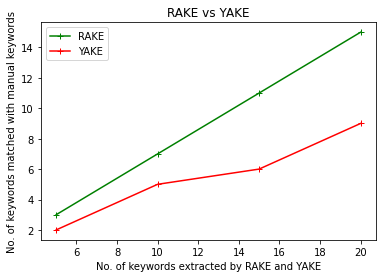

In [ ]:
from matplotlib import pyplot as plt  
plt.plot(list(rake_sol1.keys()),list(rake_sol1.values()),color='green',label="RAKE",marker='+')  
plt.plot(list(yake_sol1.keys()),list(yake_sol1.values()),color='red',label="YAKE",marker='+')
plt.xlabel("No. of keywords extracted by RAKE and YAKE")
plt.ylabel("No. of keywords matched with manual keywords")
plt.title('RAKE vs YAKE') 
plt.legend(loc='upper left')
plt.show();

In [ ]:
import pandas as pd
myList=[list(rake_sol1.values()),list(yake_sol1.values())]
myDf=pd.DataFrame(myList,columns=list(rake_sol1.keys()))
myDf.index=["no. of RAKE keywords matched","no. of YAKE keywords matched"]
newDf=myDf.T
print(newDf)


    no. of RAKE keywords matched  no. of YAKE keywords matched
5                              4                             2
10                             8                             5
15                            12                            10
20                            13                            15


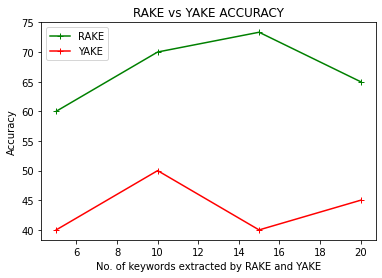

In [ ]:
from matplotlib import pyplot as plt  
plt.plot(list(rake_sol2.keys()),list(rake_sol2.values()),color='green',label="RAKE",marker='+')  
plt.plot(list(yake_sol2.keys()),list(yake_sol2.values()),color='red',label="YAKE",marker='+')
plt.xlabel("No. of keywords extracted by RAKE and YAKE")
plt.ylabel("Accuracy")
plt.title('RAKE vs YAKE ACCURACY') 
plt.legend(loc='upper left')
plt.show();

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install <model_s3_url>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `pip install <model_s3_url>'


In [ ]:
pip install en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement en_core_web_lg (from versions: none)
ERROR: No matching distribution found for en_core_web_lg


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc1 = nlp(u'/content/gdrive/MyDrive/projectfolder/output.txt')
doc2 = nlp(u'/content/gdrive/MyDrive/projectfolder/CharlestonFeb28_2020.txt')
n  = (nlp(doc1).similarity(nlp(doc2)))
print(n*100)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


95.0343712058909


<ipython-input-25-4f33b31c3ea0>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  n  = (nlp(doc1).similarity(nlp(doc2)))


In [ ]:
sum1_rake=sum(list(rake_sol1.values()))
sum2_rake=sum(rake_sol1.keys())
print("accuracy of RAKE:")
print((sum1_rake/sum2_rake)*100)
sum1_yake=sum(list(yake_sol1.values()))
sum2_yake=sum(yake_sol1.keys())
print("accuracy of YAKE:")
print((sum1_yake/sum2_yake)*100)

accuracy of RAKE:
74.0
accuracy of YAKE:
64.0


In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import tokenize,word_tokenize
def main_c(txt):
        noOfSentences=100
        stop_words=set(stopwords.words('english'))
        sentences = txt.split(".")
        noOfSentences= int(len(sentences)*(1/4))
        #print(sentences)

        #user wants to reduce the content to "no_sentences" lines.                    
        def summarize(text,no_sentences):
                word_weights={}
                for word in word_tokenize(text):
                        word=word.lower()
                        if len(word) >1 and word not in stop_words:
                            if word in word_weights.keys():
                                word_weights[word]+=1
                            else:
                                word_weights[word]=1
                sentence_weights={}
                for sent in tokenize.sent_tokenize(text):
                        sentence_weights[sent]=0
                        for word in word_tokenize(sent):
                            word=word.lower()
                            if word in word_weights.keys():
                                sentence_weights[sent]+=word_weights[word]
                highest_weights = sorted(sentence_weights.values())[-no_sentences:] # draw the graphs for the highest words and highest weighted sentences
                summary=""
                for sentence,strength in sentence_weights.items():
                        if strength in highest_weights:
                            summary+=sentence+" "
                summary = summary.replace("_"," ").strip()
                return summary

        all_reducetext1=summarize(txt,noOfSentences)
        sentences=all_reducetext1.split(".")
        return sentences

R = main_c(data1)


In [ ]:
from graphviz import Digraph
g = Digraph('unix', filename='concept-map2',node_attr={'color': 'lightblue2', 'style': 'filled','shape': 'box'})

for i in range(len(R)-1):
  if len(R[i+1])>1:
    g.edge(R[i],R[i+1])
g.view()

'concept-map2.pdf'

In [ ]:
from google.colab import files
files.download('concept-map2.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>